<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساعت یابی
</font>
</h1>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام پروژه را وارد می‌کنیم.
</font>
</p>

In [151]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصاویری که در به عنوان نمونه در اختیار شما قرار گرفته است را در سلول زیر بارگذاری کنید. و سپس به کمک <code>matplotlib</code> نمایش دهید.
</font>
</p>

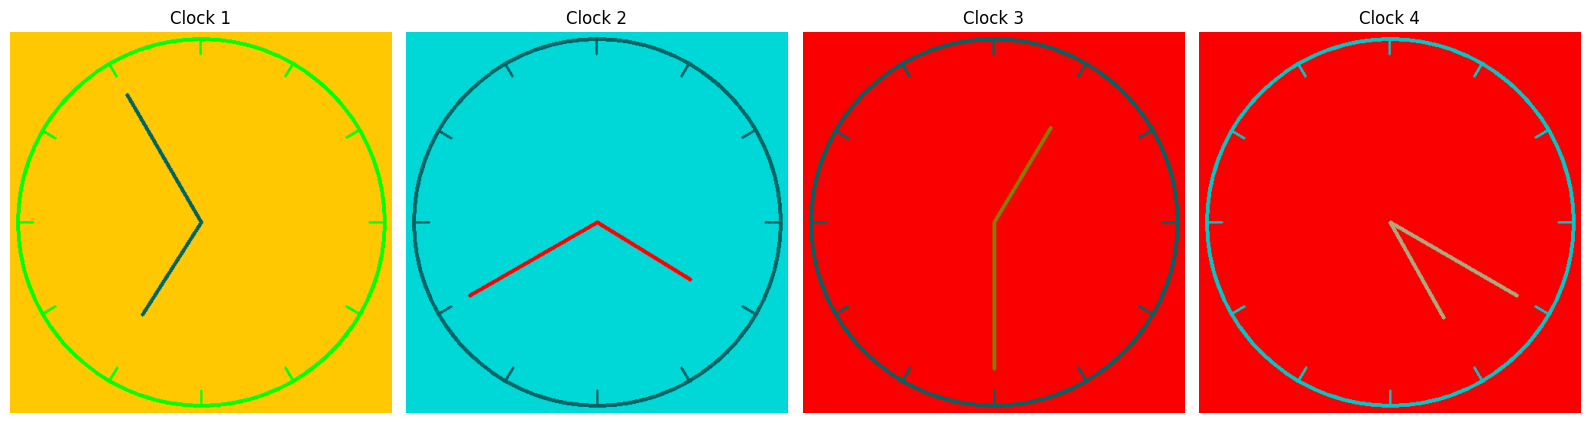

In [152]:
clocks = []
for i in range(1, 5):
    clocks.append(cv2.imread(f"../Data/clock{i}.png"))

plt.figure(figsize=(16, 8))

for i, clock in enumerate(clocks):
    plt.subplot(1, 4, i + 1)
    plt.title(f"Clock {i+1}")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(clock, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سیاه و سفید سازی تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در تمرین پیش نوشتید،  در مرحله تصاویر را به شکل ساعت های نرمال درآورید.
</font>
</p>

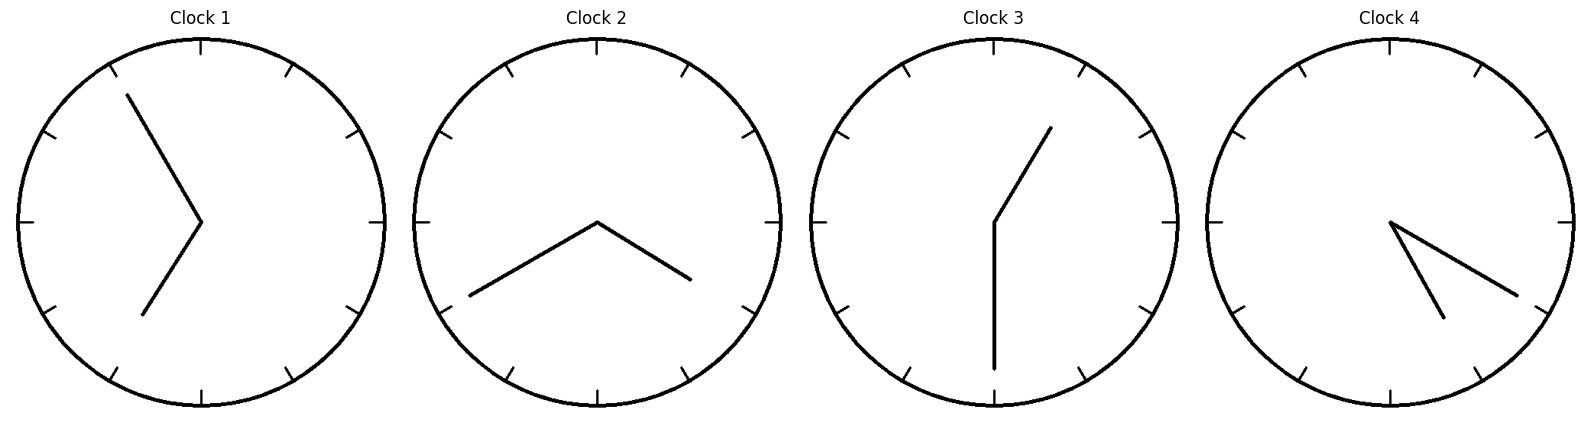

In [153]:
def black_white_convertor(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    background_pixel = np.argmax(hist)
    output = np.zeros_like(img, dtype=np.uint8)
    output[img == background_pixel] = 255
    return output


clocks_bw = []

plt.figure(figsize=(16, 8))

for i, clock in enumerate(clocks):
    clock_bw = black_white_convertor(clock)
    clocks_bw.append(clock_bw)
    plt.subplot(1, 4, i + 1)
    plt.title(f"Clock {i+1}")
    plt.axis("off")
    plt.imshow(clock_bw, cmap="gray")

plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیدا کردن ساعت
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به کمک تبدیل هاف سعی کنید پارامتر های متد را طوری تنظیم کنید تا در نهایت یک دایره که دایره اصلی است پیدا شود. در نهایت دایره را با رنگ سبز روی تصویر سیاه و سفید شده رسم کنید.
</font>
</p>

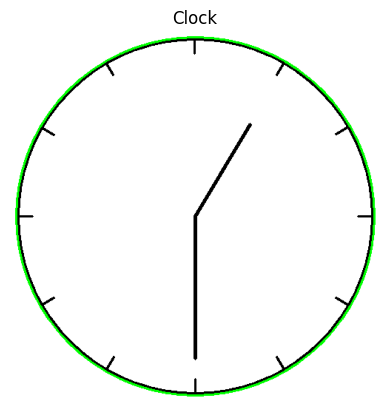

In [154]:
img =clocks_bw[2].copy()

blurred = cv2.GaussianBlur(img, (9, 9), 2)
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=200,
    param1=50,
    param2=30,
    minRadius=100,
    maxRadius=250,
)

x, y, r = map(int, circles[0, 0])


colored_clock = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(colored_clock, (x, y), r, (0, 255, 0), thickness=2)

plt.imshow(cv2.cvtColor(colored_clock, cv2.COLOR_BGR2RGB))
plt.title("Clock")
plt.axis("off")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیدا کردن عقربه ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دوباره با تبدیل هاف در سلول زیر سعی کنید خطوط (عقربه ها) را پیدا کنید. احتمالا پس از تنظیم پارامترها، چندین خط پیدا شود اما باید پس از پیدا شدن خطوط، عملیات پس پردازش را طوری تنظیم کنید که دو خط بزرگتر و کوچکتر پیدا شود که همان عقربه ساعت شمار و دقیقه شمار است. برای مثال از خطوطی که زاویه صفر دارند باید صرف نظر شود و...
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">

بعد از اجرای متد پیدا کردن خطوط به کمک تبدیل هاف، ما یه لیست از خطوط داریم (`lines`)
می‌خوایم خطوطی رو پیدا کنیم که:  
- به مرکز ساعت نزدیک باشن (احتمالاً عقربه‌ها هستن).  
- طول مناسبی داشته باشن (خیلی کوتاه نباشن).  
- موازی هم نباشن (چون ساعت و دقیقه زاویه متفاوتی دارن).  
در نهایت، از بین خطوط معتبر، دو خط رو انتخاب کنیم: یکی بلندتر (دقیقه) و یکی کوتاه‌تر (ساعت).  


پیدا کردن پارامتر های مناسب برای متد و عملیات پس پردازش خوب برای پیدا کردن عقربه ها، چالش سلول پایین است.

منطق کلی valid_lines
-  فیلتر اولیه: خطوطی که نزدیک مرکز نیستن یا خیلی کوتاهن حذف می‌شن. 
-  حذف موازی‌ها: خطوطی که زاویه‌شون شبیه هم باشه، فقط بلندترینشون نگه داشته می‌شه.
-  انتخاب نهایی: از خطوط باقی‌مونده، دو خط با طول‌های متفاوت انتخاب می‌شن (بلندتر برای دقیقه، کوتاه‌تر برای ساعت).
</div>

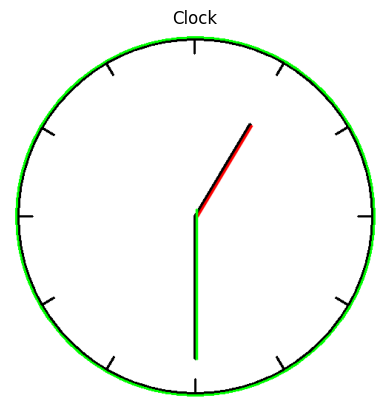

In [155]:
img = clocks_bw[2].copy()
edges = cv2.Canny(img, 30, 150)
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 90, 10)

if linesP is not None:
    clock_center = (img.shape[1] // 2, img.shape[0] // 2)

    hands = []

    for line in linesP:
        x1, y1, x2, y2 = line[0]

        d1 = np.sqrt((x1 - clock_center[0]) ** 2 + (y1 - clock_center[1]) ** 2)
        d2 = np.sqrt((x2 - clock_center[0]) ** 2 + (y2 - clock_center[1]) ** 2)

        if d1 < d2:
            start, end = (x1, y1), (x2, y2)
        else:
            start, end = (x2, y2), (x1, y1)

        length = np.linalg.norm(np.array(start) - np.array(end))
        hands.append((start, end, length))

    hands.sort(key=lambda x: x[2])

    if len(hands) >= 2:
        hour_hand = hands[0]
        minute_hand = hands[-1]

        cv2.line(colored_clock, hour_hand[0], hour_hand[1], (0, 0, 255), 2, cv2.LINE_AA)
        cv2.line(
            colored_clock, minute_hand[0], minute_hand[1], (0, 255, 0), 2, cv2.LINE_AA
        )

plt.imshow(cv2.cvtColor(colored_clock, cv2.COLOR_BGR2RGB))
plt.title("Clock")
plt.axis("off")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نوشتن تابع نهایی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نهایت تابعی بنویسید که تصویر سیاه و سفید شده را دریافت کند و پس از پیدا کردن خطوط و دایره، خطوط و دایره را روی تصویر دریافتی رسم کند و تصویر نهایی را return کند.
<br>
در واقع در سلول های قبل کد ها نوشته شده و در این سلول باید کدهای اضافه حذف شوند و و بخش های اصلی الگوریتم نگهداری شوند.
</font>
</p>

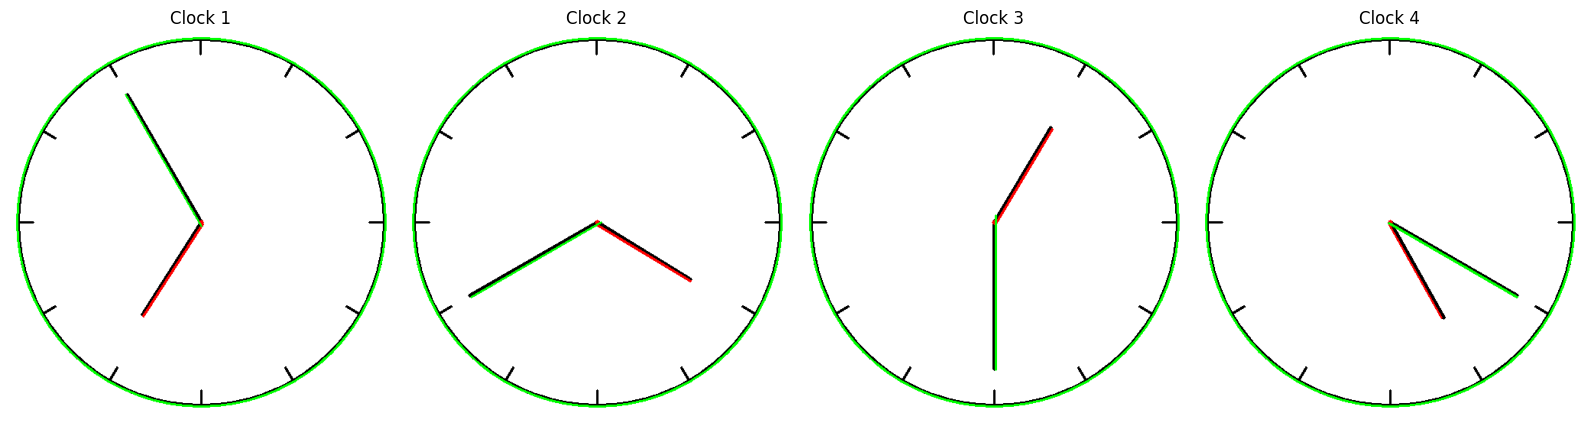

In [156]:
import math


def detect_clock(image):
    edges = cv2.Canny(image, 50, 150)

    circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=30,
        param2=20,
        minRadius=238,
        maxRadius=243,
    )

    if circles is None:
        print("No circle found")
        return None, None, None

    circles = np.uint16(np.around(circles))
    circle = circles[0, 0]
    x, y, r = circle
    center = (x, y)

    colored_clock = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    cv2.circle(colored_clock, (x, y), r, (0, 255, 0), 2)
    cv2.circle(colored_clock, (x, y), 3, (0, 0, 255), -1)

    lines = cv2.HoughLinesP(
        edges, rho=1, theta=np.pi / 180, threshold=50, minLineLength=100, maxLineGap=10
    )

    if lines is None:
        print("No lines found")
        return None, None, None, colored_clock

    valid_lines = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        length1 = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        mid_x1, mid_y1 = (x1 + x2) / 2, (y1 + y2) / 2
        dist_from_center1 = np.sqrt(
            (mid_x1 - center[0]) ** 2 + (mid_y1 - center[1]) ** 2
        )

        if dist_from_center1 < r / 2 and length1 > 100:
            angle1 = math.degrees(math.atan2(y2 - y1, x2 - x1))
            angle1 = (angle1 + 360) % 360
            is_parallel = False
            for j, line2 in enumerate(valid_lines):
                x3, y3, x4, y4 = line2[0]
                length2 = np.sqrt((x4 - x3) ** 2 + (y4 - y3) ** 2)
                angle2 = math.degrees(math.atan2(y4 - y3, x4 - x3))
                angle2 = (angle2 + 360) % 360

                if abs(angle1 - angle2) < 10 or abs(angle1 - angle2) > 350:
                    is_parallel = True
                    if length1 > length2:
                        valid_lines[j] = line
                    break
            if not is_parallel:
                valid_lines.append(line)

    max_length1, max_length2 = 0, 0
    line_hour, line_minute = None, None

    for line in valid_lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        if length > max_length1:
            max_length2 = max_length1
            line_hour = line_minute
            line_minute = line
            max_length1 = length
        elif length > max_length2:
            max_length2 = length
            line_hour = line

    if line_hour is not None:
        x1, y1, x2, y2 = line_hour[0]
        cv2.line(colored_clock, (x1, y1), (x2, y2), (0, 0, 255), 2)

    if line_minute is not None:
        x1, y1, x2, y2 = line_minute[0]
        cv2.line(colored_clock, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return colored_clock



plt.figure(figsize=(16, 8))



for i, clock in enumerate(clocks_bw):
    plt.subplot(1, 4, i + 1)

    plt.title(f"Clock {i+1}")
    plt.axis("off")


    plt.imshow(cv2.cvtColor(detect_clock(clock), cv2.COLOR_BGR2RGB))



plt.tight_layout()
plt.show()

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. توجه کنید برای کسب نمره کامل از این تمرین باید هر دو تابع خواسته شده را به درستی بنویسید.
</font>
</p>

In [157]:
import zipfile
from inspect import getsource


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """
import cv2
import numpy as np
"""

%save black_white_convertor imp + getsource(black_white_convertor)
%save detect_clock imp + getsource(detect_clock)

file_names = ["black_white_convertor.py","detect_clock.py", "notebook.ipynb"]
compress(file_names)

The following commands were written to file `black_white_convertor.py`:

import cv2
import numpy as np
def black_white_convertor(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    background_pixel = np.argmax(hist)
    output = np.zeros_like(img, dtype=np.uint8)
    output[img == background_pixel] = 255
    return output

The following commands were written to file `detect_clock.py`:

import cv2
import numpy as np
def detect_clock(image):
    edges = cv2.Canny(image, 50, 150)

    circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=30,
        param2=20,
        minRadius=238,
        maxRadius=243,
    )

    if circles is None:
        print("No circle found")
        return None, None, None

    circles = np.uint16(np.around(circles))
    circle = circles[0, 0]
    x, y, r = circle
    center = (x, y)

    colored_clock = cv2.cvtColor(image, cv2.C